In [30]:
import numpy as np
import matplotlib.pyplot as plt
from dual_autodiff.dual import Dual
plt.style.use('mystyle.mplstyle')

In [31]:
# basic operations
x = Dual(2, 1)
y = Dual(3, 1)
print(x + y)

# trigonometric functions
print(Dual(2, 1).sin())

# alternative way to use the method
x = Dual(2, 1)
print(Dual.sin(x))

Dual(real=5, dual=2)
Dual(real=0.9092974268256817, dual=-0.4161468365471424)
Dual(real=0.9092974268256817, dual=-0.4161468365471424)


Let's compute the derivative of $$f(x) = \log(\sin(x)) + x^2 \cos(x)$$ 
at $x = 1.5$.

In [32]:
def f(x):
    if isinstance(x, (int, float)):
        return np.log(np.sin(x)) + x**2 * np.cos(x)
    return Dual.log(Dual.sin(x)) + x**2 * Dual.cos(x)

def f_prime(x):
    if isinstance(x, (int, float)):
        return (np.cos(x) / np.sin(x)) + 2*x*np.cos(x) - x**2*np.sin(x)
    return Dual.cos(x) / Dual.sin(x) + 2*x*Dual.cos(x) - x**2*Dual.sin(x)


x_val = 1.5
x_dual = Dual(x_val, 1.0)
result = f(x_dual)

print(f"Analytical derivative at x={x_val}: {f_prime(x_val)}")

print(f"Value at x={x_val}: {result.real}")
print(f"AutoDiff derivative at x={x_val}: {result.dual}")

# Compare with analytical derivative
print(f"AutoDiff relative error: {np.abs((result.dual - f_prime(x_val)) / f_prime(x_val))}")

# Compare with numerical derivative
h = 1e-7
numerical_derivative = (f(x_val + h) - f(x_val)) / h
print(f"Numerical derivative: {numerical_derivative}")
print(f"Numerical relative error: {np.abs((numerical_derivative - result.dual) / result.dual)}")

Analytical derivative at x=1.5: -1.9612372705533612
Value at x=1.5: 0.15665054756073515
AutoDiff derivative at x=1.5: -1.9612372705533612
AutoDiff relative error: 0.0
Numerical derivative: -1.9612376220279337
Numerical relative error: 1.792106329176051e-07


### Visualisation

Let's see how numerical results change with step size.

In [33]:
def numerical_derivative(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

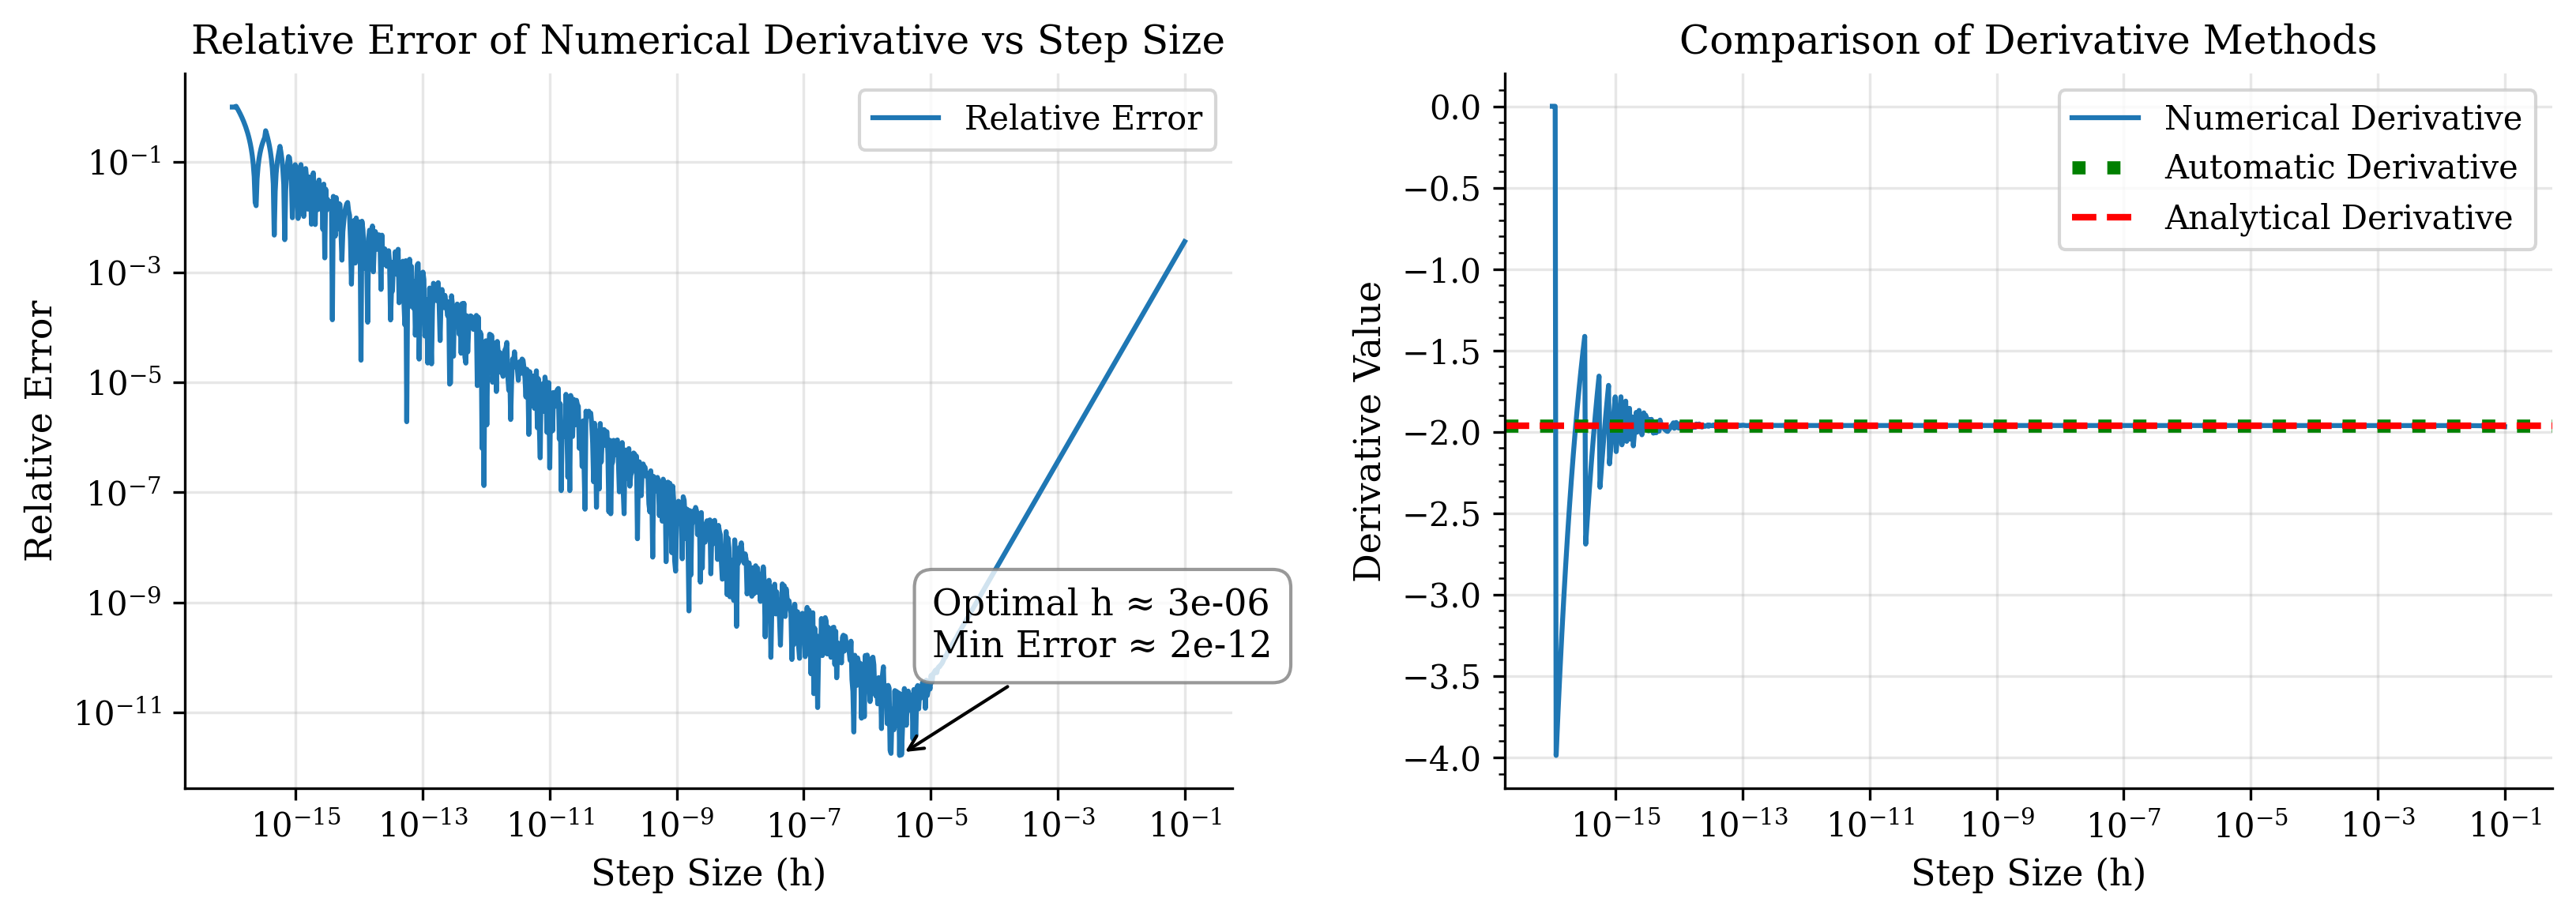


Numerical Comparison:
Analytical Derivative: -1.9612372706
Automatic Derivative: -1.9612372706
Best Numerical Derivative (h=3e-06): -1.9612372706
Minimum Relative Error: 1.65e-12


In [34]:
# Calculate derivatives
h_values = np.logspace(-16, -1, 1000)
central_derivatives = [numerical_derivative(f, x_val, h) for h in h_values]
auto_derivative = f(x_dual).dual
analytical_derivative = f_prime(x_val)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

# Plot 1: Relative error
relative_error = np.abs((central_derivatives - analytical_derivative) / analytical_derivative)
ax1.plot(h_values, relative_error, label='Relative Error')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Step Size (h)')
ax1.set_ylabel('Relative Error')
ax1.set_title('Relative Error of Numerical Derivative vs Step Size')
ax1.legend()

# Add optimal step size annotation
optimal_h = h_values[np.argmin(relative_error)]
min_error = np.min(relative_error)
ax1.annotate(f'Optimal h ≈ {optimal_h:.0e}\nMin Error ≈ {min_error:.0e}',
             xy=(optimal_h, min_error),
             xytext=(10, 30), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8),
             arrowprops=dict(arrowstyle='->'))

# Plot 2: Comparison of methods
ax2.plot(h_values, central_derivatives, label='Numerical Derivative')
ax2.axhline(y=auto_derivative, color='green', linestyle=':', 
            linewidth=4, label='Automatic Derivative')
ax2.axhline(y=analytical_derivative, color='red', linestyle='--', 
            linewidth=2, label='Analytical Derivative')

ax2.set_xscale('log')
ax2.set_xlabel('Step Size (h)')
ax2.set_ylabel('Derivative Value')
ax2.set_title('Comparison of Derivative Methods')
ax2.legend()

plt.tight_layout()
plt.savefig('../report/images/derivative_comparison.pdf', bbox_inches='tight')
plt.show()

# Print numerical comparison
print("\nNumerical Comparison:")
print(f"Analytical Derivative: {analytical_derivative:.10f}")
print(f"Automatic Derivative: {auto_derivative:.10f}")
print(f"Best Numerical Derivative (h={optimal_h:.0e}): {central_derivatives[np.argmin(relative_error)]:.10f}")
print(f"Minimum Relative Error: {min_error:.2e}")